# Project: Investigation of the 'TMDB 5000 Movie Dataset' 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this notebook, we investigate the 'TMDB 5000 Movie Dataset' from kaggle supporting us with data on the plot, cast, crew, budget, and revenues of several thousand films.

With this data, we will have a more detailed look at the Walt Disney Group and its position in the movie scene. With the acquisition of Marvel Studios and Lucasfilm is this already a position that is dominating the market? To answer this, we will answer the following questions:
 - Is there a favoured genre by the Disney Group?
 - Is there a difference in terms of budget per film for the Disney Group and the whole dataset?
 - Are Disney movies more succesful than other movies?
 - Is there a relation between budget and revenue?

In [1]:
# Import all packages for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functools
% matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load data and print out a few lines. We use the colomn 'id' as index for the dataframe

df = pd.read_csv('tmdb-movies.csv', index_col = 'id')
df.head()

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Take a first look at the structure and completeness of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj       

### **Check for shape and cleanlyness of the data**

We can see that the data in the given structure is pretty complete. But there are many pieces of information that are not useful for the further intended investigation. So we will clean the data for our needs in the next steps and inspect the structure again in this new format.

### **Data Cleaning** 

As stated above, there are several columns in the dataset that don't serve any purpose for the further investigation. So we will drop these columns in the first step. Next, we want to split columns with multiple entries into separate columns to make every element more accessible for filter options. <br>
The goal is to provide a second dataframe with all movies belonging to the Walt Disney Company. This includes the following production companies:
-  Walt Disney Pictures
-  Buena Vista Motion Pictures Group
-  Touchstone Pictures
-  Pixar Animation Studios (since 2006)
-  Marvel Studios (since 2010)
-  Lucasfilm (since 2012)
-  Hollywood Pictures (until 2007)
-  Miramax Films (until 2010)

In [4]:
# drop columns from dataset that are not needed for the futher investigation

df.drop(['popularity', 'imdb_id', 'director', 'homepage', 'tagline', 'keywords', 'overview', 'release_date'], axis=1, inplace=True)

In [5]:
# Now we can have a look for the distribution of the numeric values for this dataset.

df.describe(include=[np.number])

,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


We can see that we have plenty of zero values for the columns 'budget', 'revenue', 'budget_adj' and 'revenue_adj'. These values will cause trouble for upcoming aggregations. We will treat these as missing values and replace them with 'Nan' in the next step.

In [6]:
# replace 0 with Nan for the columns budget, revenue, budget_adj and revenue_adj

replace_zero = ['budget', 'revenue', 'budget_adj', 'revenue_adj']

for column in replace_zero:
    df[column].replace(0, np.nan, inplace=True)

In [7]:
# split columns with multiple entries

split_columns = ['cast', 'genres', 'production_companies']
for c in split_columns:  
    # we create a list with all column entries split to find the number of columns the original columns will be expanded to
    list_split = [str(x).split("|") for x in df[c]]
    for i in range(max([len(y) for y in list_split])):
        df['{}{}'.format(c,i+1)] = df[c].str.split("|", expand=True)[i]
        
# drop original columns from dataset as they are no longer needed
df.drop(['cast', 'genres', 'production_companies'], axis=1, inplace=True)

In [8]:
# create a dataframe only containig movies by Walt Disney Company 

disney_company = ['Walt Disney Pictures', 'Touchstone Pictures', 'Buena Vista']
mask = functools.reduce(np.logical_or, [df['production_companies{}'.format(i)].isin(disney_company) for i in range(1, 6)])
df_disney = df.loc[mask]

In [9]:
# gather data for acquired companies by the time they were acquired by Disney and append data to Disney dataframe

acquired_companies = { 'Pixar Animation Studios': 2006,
                        'Marvel Studios': 2010,
                        'Lucasfilm': 2012 }

for x in acquired_companies:
    mask_acquired = np.logical_and(df['release_year']>= acquired_companies[x], functools.reduce(np.logical_or, [df['production_companies{}'.format(i)].str.contains(x, na=False) for i in range(1, 6)]))
    df_disney = df_disney.append(df.loc[mask_acquired])

In [10]:
# gather data for sold companies by the time they were sold by Disney and append data to Disney dataframe

sold_companies = { 'Hollywood Pictures': 2007,
                        'Miramax Films': 2010}

for x in sold_companies:
    mask_sold = np.logical_and(df['release_year']<= sold_companies[x], functools.reduce(np.logical_or, [df['production_companies{}'.format(i)].str.contains(x, na=False) for i in range(1, 6)]))
    df_disney = df_disney.append(df.loc[mask_sold])

In [11]:
# Last, we will drop all duplicates from the new disney dataframe

df_disney.drop_duplicates()

,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,cast1,...,genres1,genres2,genres3,genres4,genres5,production_companies1,production_companies2,production_companies3,production_companies4,production_companies5
id,,,,,,,,,,,,,,,,,,,,,
150540,175000000.0,8.537086e+08,Inside Out,94,3935,8.0,2015,1.609999e+08,7.854116e+08,Amy Poehler,...,Comedy,Animation,Family,None,None,Walt Disney Pictures,Pixar Animation Studios,Walt Disney Studios Motion Pictures,None,None
150689,95000000.0,5.423514e+08,Cinderella,112,1495,6.8,2015,8.739996e+07,4.989630e+08,Lily James,...,Romance,Fantasy,Family,Drama,None,Walt Disney Pictures,Genre Films,Beagle Pug Films,Allison Shearmur Productions,None
158852,190000000.0,2.090357e+08,Tomorrowland,130,1899,6.2,2015,1.747999e+08,1.923127e+08,Britt Robertson,...,Action,Family,Science Fiction,Adventure,Mystery,Walt Disney Pictures,Babieka,A113,None,None
105864,175000000.0,3.319261e+08,The Good Dinosaur,93,1087,6.6,2015,1.609999e+08,3.053719e+08,Raymond Ochoa,...,Adventure,Animation,Comedy,Family,Fantasy,Walt Disney Pictures,Pixar Animation Studios,Buena Vista,None,None
326359,NaN,NaN,Frozen Fever,8,475,7.0,2015,NaN,NaN,Kristen Bell,...,Adventure,Animation,Family,None,None,Walt Disney Pictures,Walt Disney Animation Studios,None,None,None
228203,NaN,4.571006e+07,"McFarland, USA",128,139,7.4,2015,NaN,4.205324e+07,Kevin Costner,...,Drama,None,None,None,None,Walt Disney Pictures,Mayhem Pictures,None,None,None
302429,NaN,1.360345e+07,Strange Magic,99,68,6.1,2015,NaN,1.251517e+07,Alan Cumming,...,Music,Animation,Family,Fantasy,None,Lucasfilm,Touchstone Pictures,None,None,None
355338,NaN,NaN,Riley's First Date?,5,137,7.3,2015,NaN,NaN,Amy Poehler,...,Animation,Family,None,None,None,Walt Disney Pictures,Pixar Animation Studios,None,None,None
177572,165000000.0,6.521054e+08,Big Hero 6,102,4185,7.8,2014,1.519800e+08,6.006485e+08,Scott Adsit,...,Adventure,Family,Animation,Action,Comedy,Walt Disney Pictures,Walt Disney Animation Studios,None,None,None


In [12]:
# Remove Disney movies from the original movie dataset

df.drop(df_disney.index, inplace=True)

In [13]:
df_disney.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 150540 to 12664
Data columns (total 24 columns):
budget                   419 non-null float64
revenue                  423 non-null float64
original_title           643 non-null object
runtime                  643 non-null int64
vote_count               643 non-null int64
vote_average             643 non-null float64
release_year             643 non-null int64
budget_adj               419 non-null float64
revenue_adj              423 non-null float64
cast1                    641 non-null object
cast2                    638 non-null object
cast3                    633 non-null object
cast4                    629 non-null object
cast5                    621 non-null object
genres1                  642 non-null object
genres2                  563 non-null object
genres3                  380 non-null object
genres4                  186 non-null object
genres5                  61 non-null object
production_companies1    643 non

In [14]:
# in the last step with group both dataframes by 'release year' to show changes over time 

df_year = df.groupby('release_year').sum()
disney_year = df_disney.groupby('release_year').sum()

In [15]:
df_year.describe()

,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,5.600000e+01,5.600000e+01,56.000000,56.000000,56.000000,5.600000e+01,5.600000e+01
mean,2.456514e+09,6.584836e+09,18697.321429,37214.732143,1090.312500,2.963713e+09,8.631940e+09
std,2.863336e+09,7.006996e+09,17733.080059,49432.231931,1062.489377,2.814562e+09,6.146675e+09
min,2.205695e+07,8.473669e+07,3213.000000,1446.000000,178.900000,1.626252e+08,5.692623e+08
25%,9.173165e+07,8.096563e+08,5001.250000,5141.750000,293.775000,5.130648e+08,3.564336e+09
50%,7.752800e+08,3.095836e+09,12373.500000,14501.000000,719.300000,1.521541e+09,6.233592e+09
75%,4.905541e+09,1.162816e+10,24290.000000,53552.000000,1326.300000,6.045599e+09,1.418072e+10
max,7.922038e+09,2.212960e+10,67316.000000,192179.000000,4022.700000,7.974255e+09,2.101746e+10


In [16]:
disney_year.describe()

,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,4.200000e+01,4.200000e+01,42.000000,42.000000,42.000000,4.200000e+01,4.200000e+01
mean,5.535257e+08,1.683601e+09,1512.761905,7309.119048,94.835714,6.337811e+08,1.940034e+09
std,5.353628e+08,1.742394e+09,1206.802949,7843.841913,70.231203,5.632560e+08,1.675610e+09
min,0.000000e+00,0.000000e+00,78.000000,11.000000,5.700000,0.000000e+00,0.000000e+00
25%,2.370000e+07,1.038269e+08,176.750000,447.750000,14.725000,4.994103e+07,2.526795e+08
50%,3.923035e+08,1.580457e+09,1380.500000,4732.000000,103.250000,5.689227e+08,1.873065e+09
75%,9.712500e+08,2.602825e+09,2664.000000,12483.250000,165.325000,1.129416e+09,2.941096e+09
max,1.700000e+09,7.187390e+09,3792.000000,28182.000000,213.800000,1.700000e+09,6.612396e+09


In [17]:
# Drop rows from the grouped dataframe for years that dont have data in the columns 'budget' and 'revenue'

disney_year.drop((disney_year[disney_year['budget'] == 0]).index, inplace=True)

### Inspection of the new Disney Dataframe

We can see that we have several missing values in the columns for cast, genre, and production company. We have no way to fill these gaps with data that would make sense. This fact isn't an issue because we use these columns only to filter for given values. The gaps won't influence any aggregation functions or something like this, so we leave at it is. <br>
We handled to the problem with Zero values in the columns budget and revenue so that we can now start to further explore the data.

<a id='eda'></a>
## Exploratory Data Analysis

In [18]:
# First we set the figure size for the notebook to a larger scale

plt.rcParams["figure.figsize"] = [12, 9]

## Is there a favoured genre by the Disney Group?

In [70]:
# Find the value count for each genre in all of the 5 genre columns

df_genre = pd.melt(df_disney[['genres1', 'genres2', 'genres3', 'genres4', 'genres5']])
genres = df_genre.dropna()
genres = genres.apply(pd.value_counts)
genres = genres.drop(['genres1', 'genres2', 'genres3', 'genres4', 'genres5'])

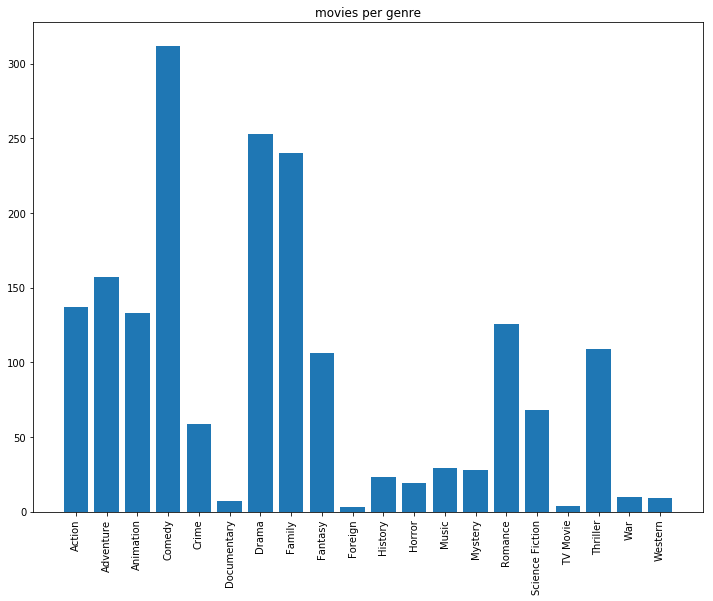

In [71]:
# Plot the findings

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(genres.index, genres['value'])
ax.set(title='movies per genre') 
plt.xticks(rotation=90)

plt.show()

With this bar chart, we can see that the majority of films produced by the Disney Group belong to the genre 'Comedy'. Additionally, we can see high counts in the genres 'Family' and 'Animation'. This shows that the Disney Group still has a focus on family entertainment. Actually, this is where Walt Disney came from. <br>
Its surprising to see the genre 'Drama' as the second most genre of all Disney films. This fact in combination with the high numbers for 'Action', 'Adventure', 'Thriller', and 'Romance' shows the huge diversity of films that the Disney Group is producing. The ability to please several kinds of potential viewers might be one aspect of the success of this company.

### Is there a difference in terms of budget per film for the Disney Group and the whole dataset?

In [ ]:
# Find the fim count and calculate the average budget per film for each year 

disney_film_count = df_disney.groupby('release_year')['original_title'].count()
movie_film_count = df.groupby('release_year')['original_title'].count()

disney_budget_per_film = disney_year['budget'] / disney_film_count
movies_budget_per_film = df_year['budget'] / movie_film_count

In [ ]:
# Plot the findings

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(movies_budget_per_film, label= 'Other Companies')
ax.plot(disney_budget_per_film, label = 'Disney Group')
ax.set(title='average budget per film', ylabel='budget', xlabel='year') 
ax.legend(loc='best')
plt.show()

We can clearly see a huge difference in the average budget per film for the Disney Group and other companies for the years after 1997. The average budget for a Disney movie in the years 2010 and after is more than 3 times higher than the budget for the whole dataset.

### Are Disney movies more succesful than other movies?

In [ ]:
# Calculate ROI(return on investment) for both dataframes as a degree for success

movie_ROI = df_year['revenue'] / df_year['budget']
disney_ROI = disney_year['revenue'] / disney_year['budget']

In [ ]:
# Plot the findings

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(122)
ax.plot(disney_ROI, label= 'Disney Group')
ax.plot(movie_ROI, label= 'Other Companies')
ax.set(title='ROI by year', ylabel='ROI (Return on Investment)', xlabel='year') 
ax.legend(loc='best')

ax = fig.add_subplot(121)
ax.plot(disney_year['revenue'], label= 'Disney Group')
ax.plot(df_year['revenue'], label= 'Other Companies')
ax.set(title='revenue by year', ylabel='revenue', xlabel='year') 
ax.legend(loc='best')

plt.show();

Here we can see, that the revenue on its own is much lower for the Disney Group compared to the sum of all other companies. If we look at the revenue in relation to the budget we can see that the Walt Disney Group have an outlier around the year 1970. If we look up this outlier we will notice, that this is the film "Jungle Book" that made enormous revenue in relation to the investment. <br>
Although there are 2 additional peaks after the initial outlier, I would call the curves pretty similar because there are also peaks in the curve for the other companies.
Around the year 1995, both curves flatten. With the year 2006, there seems to be an uptrend for both curves. Though the growth seems to be a bit higher for the Disney Group. In the year 2015, we can clearly see, that the Disney Group has a higher Return on investment on average. This might be indicated by the acquisition the Walt Disney Group started in the year 2006.

In [ ]:
# Calculate proportions from movies and revenue for Disney Group

disney_movie_share = disney_film_count/(disney_film_count + movie_film_count)
disney_revenue_share = disney_year['revenue'] / (disney_year['revenue'] + df_year['revenue'])

In [ ]:
# Plot the findings

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(disney_movie_share, label= 'movie share')
ax.plot(disney_revenue_share, label= 'revenue share')
ax.set(title='Share of moviecount and revenue by year', ylabel='Share', xlabel='year') 
ax.legend(loc='best');

This visualization is really interesting. First, we can see that the Disney Company was able to increase its share from the yearly total revenue steadily. At first, this was accomplished by making more movies per year until around 1997. 
After that, we can notice a decline in the number of movies and in the share of total revenue till around 2006. The acquisition of "Pixar Animation Studios" in 2006 started a trend of producing lesser movies but generating a much higher share of the total revenue per year. This trend seems to hold on for the acquisition of "Marvel Studios" in 2010 and "Lucasfilm" in 2012. In the year 2015, the Disney Group was able to maintain a share of more than 25% of the total revenue with less than 5% of the movie count in this year.

### Is there a relation between budget and revenue?

A huge growth in both, budgets and revenue for the Disney Group might indicate a relation between those variables. We take a closer look at this in the next step.

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(disney_year['budget'], disney_year['revenue'])

ax.set(title='relation between budget and revenue', ylabel='revenue', xlabel='budget') 
plt.show()

The above scatterplot shows a strong positive relationship between budget and revenue for the Disney dataset that is grouped by years. To confirm these observations were going to calculate the correlation factor for these two variables in the next step. 

In [ ]:
# Calculate correlation factor

disney_year[['budget', 'revenue']].corr()

##### <a id='conclusions'></a>
## Conclusions

Addressing the question asked in the introduction: I think we can say that the Disney Group have a pretty huge influence on the movie scene. Especially in regards to the last years, we could assume a dominating position. As for the year 2015, Disney was able to make a share of more than a quarter of the revenue for this dataset with less than 3% of the movies in this year. 
This means that the films made by Disney are the films that are most interesting for cinema visitors. <br>
This fact has an additional impact on the television and streaming industry because Disney is holding the rights for the films that most viewers are interested in. This could be a big problem for the rest of the industry if Disney decides to publish their content exclusively through their own channels. <br><br>
In this report, we focussed our work on the Disney Group. There might be other major players in the movie scene that are a strong counterpart for the Disney Group. We didn't shape our data in that way so that we can't tell if this is true. We sad that in 2015, Disney had a share of around 25% of this year's total revenue. Maybe the remaining 75% are evenly shared by 3 other big players in this industry. This would mean none of this company would have a dominating position. <br>
So, in conclusion, we can say that the analysis of this report is limited to the data that was put in. We can only make assumptions based on the analysis of this dataset. 

## Sources used to create this report:

 - python & pandas official documentation
 - stackoverflow (especially this thread for creating the Disney Group mask(s): 
     https://stackoverflow.com/questions/26970775/find-string-in-multiple-columns?
 - https://www.datacamp.com/community/blog/python-matplotlib-cheat-sheet
 - input from Udacity reviewer